Import Packages and Fetch Data

In [45]:
# Setup
import numpy as np
import pandas as pd
import os
import tarfile
import csv

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Alzheimers Dataset
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ashleythorlin/Risk-Prediction-For-Alzheimers/main/"
ALZHEIMERS_PATH = "dataset"
ALZHEIMERS_URL = DOWNLOAD_ROOT + "dataset/Alzheimer_s_Disease_and_Healthy_Aging_Data.csv?token=GHSAT0AAAAAACALXBOZACPGSM5KBYSQMM26ZA72J7A"

def fetch_alzheimers_data(alzheimers_url=ALZHEIMERS_URL, alzheimers_path=ALZHEIMERS_PATH):
    tgz_path = os.path.join(alzheimers_path, "Alzheimer_s_Disease_and_Healthy_Aging_Data.csv")
    alzheimers_tgz = tarfile.open(tgz_path)
    alzheimers_tgz.extractall(path=alzheimers_path)
    alzheimers_tgz.close()
    
def load_alzheimers_data(alzheimers_path=ALZHEIMERS_PATH):
    csv_path = os.path.join(alzheimers_path, "Alzheimer_s_Disease_and_Healthy_Aging_Data.csv")
    return pd.read_csv(csv_path)


In [15]:
alzheimers = load_alzheimers_data()
# alzheimers.head()

/var/folders/93/wvjyds_n62x_cn34lfc_6f080000gn/T/ipykernel_27680/339042562.py:27: DtypeWarning: Columns (17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(csv_path)


In [16]:
alzheimers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214462 entries, 0 to 214461
Data columns (total 39 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   RowId                       0 non-null       float64
 1   YearStart                   214462 non-null  int64  
 2   YearEnd                     214462 non-null  int64  
 3   LocationAbbr                214462 non-null  object 
 4   LocationDesc                214462 non-null  object 
 5   Datasource                  214462 non-null  object 
 6   Class                       214462 non-null  object 
 7   Topic                       214462 non-null  object 
 8   Question                    214462 non-null  object 
 9   Response                    0 non-null       float64
 10  Data_Value_Unit             214462 non-null  object 
 11  DataValueTypeID             214462 non-null  object 
 12  Data_Value_Type             214462 non-null  object 
 13  Data_Value    

In [17]:
alzheimers.describe()

,RowId,YearStart,YearEnd,Response,Data_Value,Data_Value_Alt,Sample_Size,StratificationCategory3,Stratification3,ResponseID,LocationID,StratificationCategoryID3,StratificationID3,Report
count,0.0,214462.000000,214462.000000,0.0,144629.000000,144629.000000,0.0,0.0,0.0,0.0,214462.000000,0.0,0.0,0.0
mean,NaN,2017.378477,2017.634000,NaN,37.341956,37.341956,NaN,NaN,NaN,NaN,800.987821,NaN,NaN,NaN
std,NaN,1.779822,1.778926,NaN,25.183017,25.183017,NaN,NaN,NaN,NaN,2512.934094,NaN,NaN,NaN
min,NaN,2015.000000,2015.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,2016.000000,2016.000000,NaN,15.300000,15.300000,NaN,NaN,NaN,NaN,18.000000,NaN,NaN,NaN
50%,NaN,2017.000000,2018.000000,NaN,32.500000,32.500000,NaN,NaN,NaN,NaN,33.000000,NaN,NaN,NaN
75%,NaN,2019.000000,2019.000000,NaN,56.800000,56.800000,NaN,NaN,NaN,NaN,49.000000,NaN,NaN,NaN
max,NaN,2020.000000,2020.000000,NaN,100.000000,100.000000,NaN,NaN,NaN,NaN,9004.000000,NaN,NaN,NaN


### Visualizing the Data

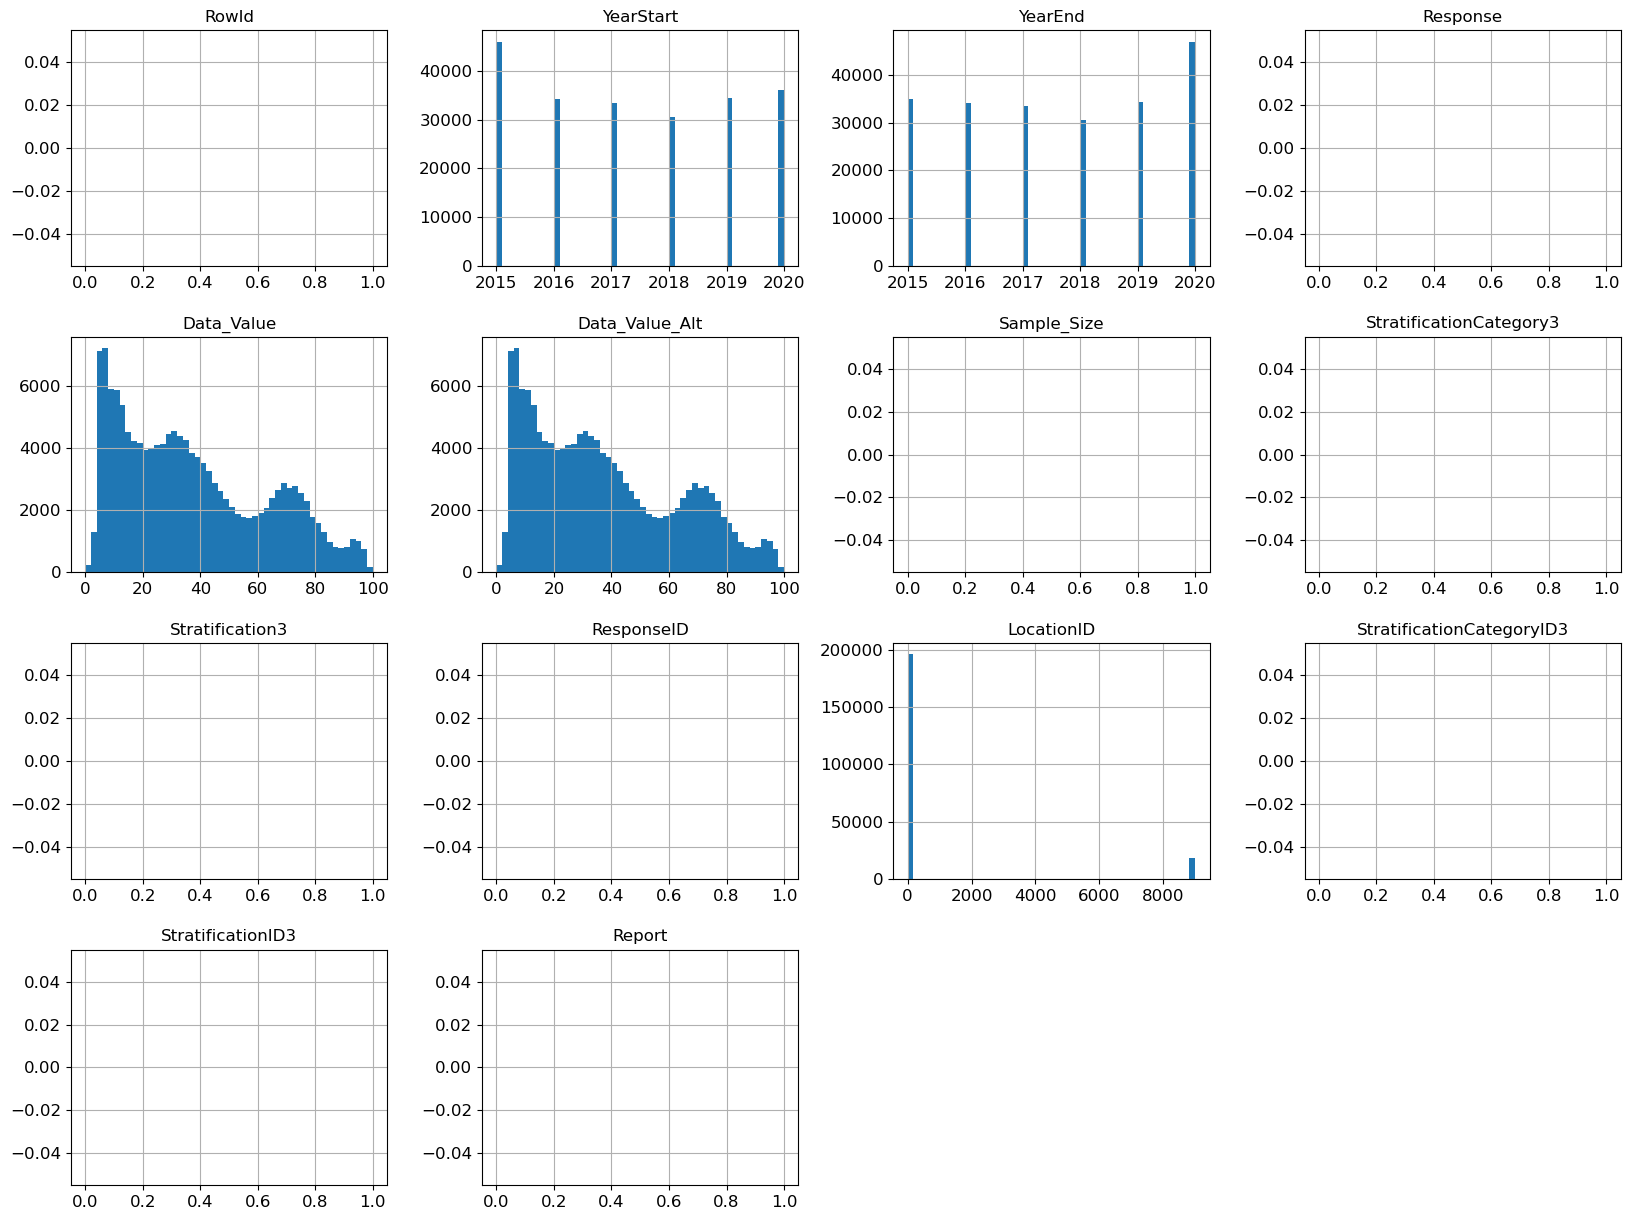

In [18]:
alzheimers.hist(bins=50, figsize=(20,15))
plt.show()

### Identifying Correlations

### Experimenting with Attribute Combinations

### Data Cleaning

Delete the following columns:

RowID, LocationAbbr, Datasource, Response, Data_Value_Unit, DataValueTypeID, Sample_Size, Geolocation, ClassID, TopicID, QuestionID, ResponseID, LocationID, StratificationID1, StratificationCategory2, Stratification2, Stratification3, StratificationCategoryID3 StratificationID3

In [19]:
columns_drop = [
    'RowId', 'LocationAbbr', 'Datasource', 'Response', 'Data_Value_Unit', 
    'DataValueTypeID', 'Sample_Size', 'Geolocation', 'ClassID', 'TopicID',
    'QuestionID', 'ResponseID', 'LocationID', 'StratificationID1', 
    'StratificationCategory2', 'Stratification2', 'Stratification3', 
    'StratificationCategoryID3', 'StratificationID3', 'Report', 'Question',
    'Data_Value_Alt', 'StratificationCategory3','StratificationCategoryID1'
    ]
alzheimers_clean = alzheimers.drop(labels=columns_drop, axis=1)
alzheimers_clean.head()

,YearStart,YearEnd,LocationDesc,Class,Topic,Data_Value_Type,Data_Value,Data_Value_Footnote_Symbol,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,StratificationCategory1,Stratification1,StratificationCategoryID2,StratificationID2
0,2020,2020,Hawaii,Overall Health,Arthritis among older adults,Percentage,26.3,NaN,NaN,23.9,29.0,Age Group,50-64 years,OVERALL,OVERALL
1,2017,2017,Idaho,Mental Health,Lifetime diagnosis of depression,Percentage,24.0,NaN,NaN,21.2,27.0,Age Group,50-64 years,OVERALL,OVERALL
2,2017,2017,Idaho,Overall Health,Arthritis among older adults,Percentage,35.7,NaN,NaN,32.5,39.1,Age Group,50-64 years,OVERALL,OVERALL
3,2018,2018,Idaho,Overall Health,Physically unhealthy days (mean number of days),Mean,4.8,NaN,NaN,4.0,5.5,Age Group,50-64 years,OVERALL,OVERALL
4,2020,2020,Indiana,Mental Health,Lifetime diagnosis of depression,Percentage,13.7,NaN,NaN,12.1,15.4,Age Group,Overall,GENDER,MALE


Separating Dataset into Different Dataframes Based on Class (Overall Health, Mental Health, etc.)

In [20]:
# Retrieve unique values from Class
class_names = alzheimers_clean["Class"].unique()
print(class_names)
# Create dataframes for each class
overall_health = alzheimers_clean[alzheimers_clean['Class'] == 'Overall Health'].drop(labels='Class', axis=1)
mental_health = alzheimers_clean[alzheimers_clean['Class'] == 'Mental Health'].drop(labels='Class', axis=1)
smoking_alcohol = alzheimers_clean[alzheimers_clean['Class'] == 'Smoking and Alcohol Use'].drop(labels='Class', axis=1)
screenings_vaccines = alzheimers_clean[alzheimers_clean['Class'] == 'Screenings and Vaccines'].drop(labels='Class', axis=1)
nutrition = alzheimers_clean[alzheimers_clean['Class'] == 'Nutrition/Physical Activity/Obesity'].drop(labels='Class', axis=1)
caregiving = alzheimers_clean[alzheimers_clean['Class'] == 'Caregiving'].drop(labels='Class', axis=1)
cognitive_decline = alzheimers_clean[alzheimers_clean['Class'] == 'Cognitive Decline'].drop(labels='Class', axis=1)

alzheimers_dfs = [overall_health, mental_health, smoking_alcohol, screenings_vaccines, nutrition, caregiving, cognitive_decline] 

#overall_health.head()

['Overall Health' 'Mental Health' 'Smoking and Alcohol Use'
 'Screenings and Vaccines' 'Cognitive Decline'
 'Nutrition/Physical Activity/Obesity' 'Caregiving']


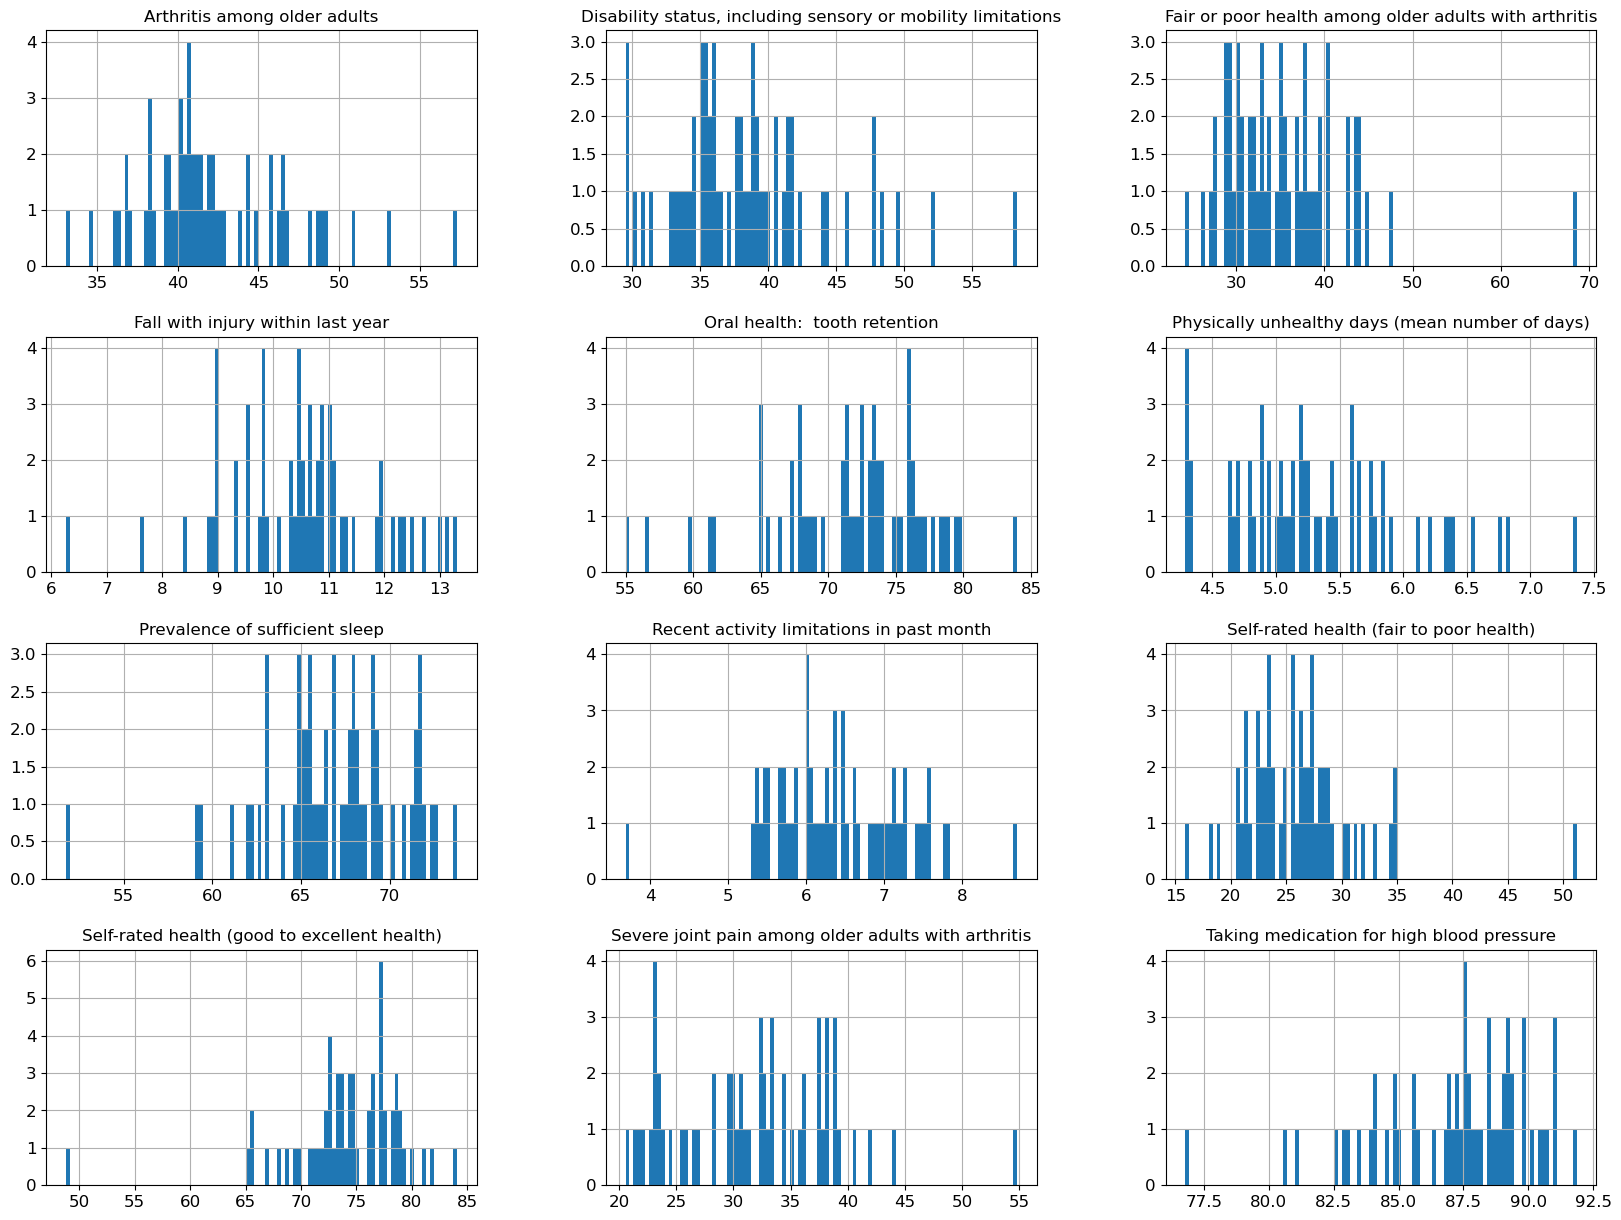

In [21]:
for i in range(len(alzheimers_dfs)):
    alzheimers_dfs[i] = pd.pivot_table(alzheimers_dfs[i], 
                        values='Data_Value', 
                        index=['LocationDesc'],
                        columns=['Topic'])
# plot the data
alzheimers_dfs[0].hist(bins=100 , figsize=(20,15))
plt.show()

Handling Text and Categorical Attributes

Handling Missing Values & Outliers

Feature Scaling

Transform Feature Encoding

Dimensionality Reduction